# Deep Learning Course: Lab Exercises

In this lab exercise you will:

a) Learn about PyTorch DataLoaders and how to build your own on a custom dataset.

b) Learn how to train and evaluate a convolutional neural network.



# Q1 DataLoaders

### Connect your drive account

In order to upload the numpy files of the given folder, you can use the ‘drive’ package from google.colab library like this:

- from google.colab import drive

Then, you define the destination of your Drive account like this:

- drive=drive.mount('/content/drive')

Finally, you can load files from the given folder in this way:

- arr_train_labels=np.load('drive/.._folderdestination_../train_labels.npy')

In [ ]:
import os
import numpy as np
import pandas as pd
from google.colab import drive

drive = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## add the name of the folder you uploaded to Colab
drive_folder = 'drive/MyDrive/DL_LAB_3'

In [ ]:
## load train, test and validation label arrays
train_images = np.load(os.path.join(drive_folder, 'train_images.npy'))
val_images = np.load(os.path.join(drive_folder, 'val_images.npy'))
test_images = np.load(os.path.join(drive_folder, 'test_images.npy'))

train_labels = np.load(os.path.join(drive_folder, 'train_labels.npy'))
val_labels = np.load(os.path.join(drive_folder, 'val_labels.npy'))
test_labels = np.load(os.path.join(drive_folder, 'test_labels.npy'))

In [ ]:
print('train images', train_images.shape)
print('val images', val_images.shape)
print('train labels', train_labels.shape)
print('val labels', val_labels.shape)

train images (5000, 1, 28, 28)
val images (1000, 1, 28, 28)
train labels (5000,)
val labels (1000,)


Print a random training image.

In [ ]:
print(train_images[124])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0  48 241 176   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  13 172 252 225   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  57 252 252 187   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  57 252 252 113   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  57 253 253 114   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  57 252 252  63   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0  57 252 252  76  

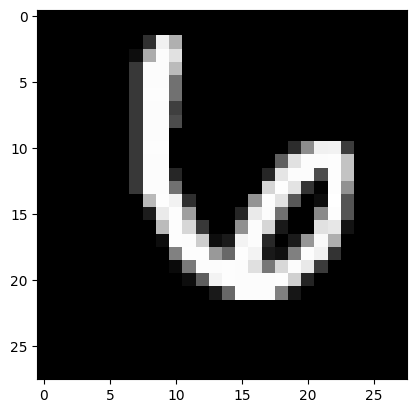

In [ ]:
from matplotlib import pyplot as plt

##print a random image
# *****START CODE
plt.imshow(train_images[124, 0], cmap='gray')
plt.show()
# *****END CODE

Print the corresponding label for the image that you printed.

In [ ]:
##print the corresponding label
# *****START CODE
train_labels[124]
# *****END CODE

6

Iterate through the training images with a for loop and collate batches of size 10 (using slicing)

In [ ]:
# *****START CODE
batchsize = 512
for start_idx in range(0, len(train_images), batchsize):
  image_batch = train_images[start_idx: start_idx+batchsize]
  label_batch = train_labels[start_idx: start_idx+batchsize]
  print('image_batch', image_batch.shape)
  print('label_batch', label_batch.shape)
# *****END CODE

image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (512, 1, 28, 28)
label_batch (512,)
image_batch (392, 1, 28, 28)
label_batch (392,)


### Familiarize with .csv files

Here, we show you how to create a csv file with the the following table:

| Name         | Surname        | Gender |
| ------------ | ------------ | ------- |
| Mary         | Smith        | Female       |
| James        | Williams     | Male     |
| Sarah        | Martin       | Female      |
| Peter        | Miller       | Male     |

In [ ]:
import pandas as pd

# First create each column as a list

names = ['Mary', 'James', 'Sarah', 'Peter']
surnames = ['Smith', 'Williams', 'Martin', 'Miller']
genders = ['Female', 'Male', 'Female', 'Male']

# Then create a pandas DataFrame from these lists and set the columns names

df = pd.DataFrame({'Name': names ,
                   'Surname': surnames ,
                   'Gender': genders})

# Finally save the DataFrame to a .csv file
df.to_csv(os.path.join(drive_folder, 'toy.csv'), index=False, columns = ['Name', 'Surname', 'Gender'])

# You can now read the .csv file to get a DataFrame again
toy = pd.read_csv(os.path.join(drive_folder, 'toy.csv'))

# And show few rows of the the DataFrame
toy.head()

,Name,Surname,Gender
0,Mary,Smith,Female
1,James,Williams,Male
2,Sarah,Martin,Female
3,Peter,Miller,Male


Use iloc command from 	[pandas library](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html 'Learn .iloc') pandas library to access specific items

In [ ]:
##show first column
toy.iloc[:, 0]

0     Mary
1    James
2    Sarah
3    Peter
Name: Name, dtype: object

In [ ]:
##show second row
# *****START CODE
toy.iloc[1, :]
# *****END CODE

Name          James
Surname    Williams
Gender         Male
Name: 1, dtype: object

In [ ]:
##show element in first row and second column
# *****START CODE
toy.iloc[0, 1]
# *****END CODE

'Smith'

#Create your own custom DataLoader

Use the numpy files to define your own custom dataloader.

a) Create a DataFrame for each split (train, val and test) with 2 columns :
- ‘image_ID’, which involves the image index locations
- ‘label’, which involves the corresponding label for every image index

b) Plot the distribution of labels for each split with [groupby().count()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [pandas.Series.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html?highlight=plot#pandas.Series.plot 'pandas.Series.plot') functions.

c) Save the DataFrames as .csv files.

In [ ]:
## Create the DataFrame for the train split and show the first few rows
# *****START CODE
df = pd.DataFrame({'image_ID': range(len(train_labels)),
                   'label': train_labels})
# *****END CODE

<Axes: xlabel='label'>

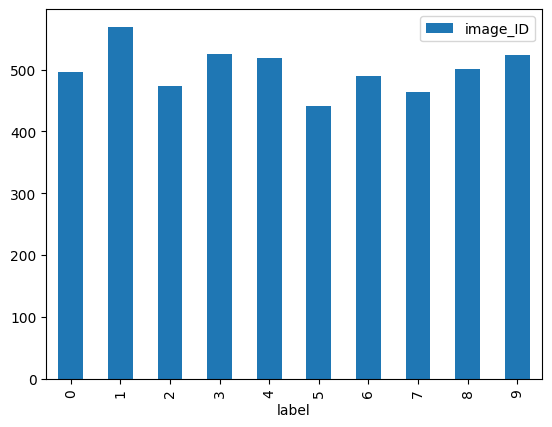

In [ ]:
## Plot the distribution of labels using a bar plot
# *****START CODE
count = df.groupby('label').count()
count.plot.bar()
# *****END CODE

In [ ]:
## Save the DataFrame as a .csv file
# *****START CODE
df.to_csv(os.path.join(drive_folder, 'train.csv'), index=False, columns=['image_ID', 'label'])
# *****END CODE

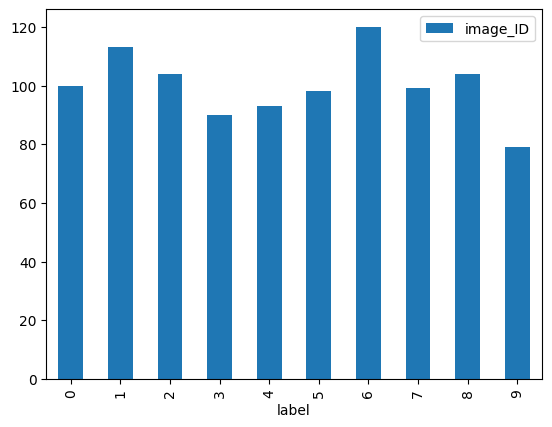

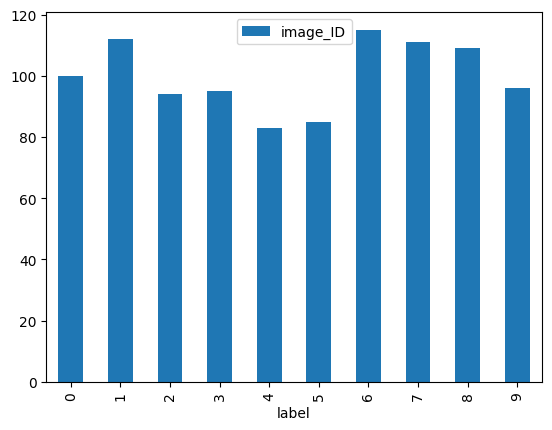

In [ ]:
## Do the same for both val and test splits
## HINT : you can wrap the previous steps into a function to do all 3 at once
# *****START CODE
def create_csv(labels, destination):
  df = pd.DataFrame({'image_ID': range(len(labels)),
                     'label': labels})
  counts = df.groupby('label').count()
  counts.plot.bar()

  df.to_csv(destination, index=False, columns = ['image_ID', 'label'])

create_csv(val_labels, os.path.join(drive_folder, 'val.csv'))
create_csv(test_labels, os.path.join(drive_folder, 'test.csv'))

# *****END CODE

d) Now create your own custom dataloader. When building a custom dataloader, it is necessary to define a dataset class first which involves 3 required functions:

- __init__, for the class initialization

- __getitem__, for data extraction according to given indexes

-  __len__, for calculating the total number of data samples

In [ ]:
from torch.utils.data.dataset import Dataset

class MyDataset(Dataset):
    def __init__(self, csv_path, images_file):
        ## Read the csv file with pandas library
        # *****START CODE
        self.data_info = pd.read_csv(csv_path)

        ##Load the numpy array of images
        self.images = np.load(images_file)
        # *****END CODE

    def __getitem__(self, index):
        ## Get the image-label set using the given index
        ## Hint: use iloc command from pandas library
        # *****START CODE
        image_id = self.data_info.iloc[index, 0]
        image = self.images[image_id]
        label = int(self.data_info.iloc[index, 1])
        # *****END CODE
        ## bring all image spectral values to the range of [0,1]
        image = image/255.0

        return image, label

    def __len__(self):
        ## return the total number of data samples
        return len(self.data_info)

c) Call the dataloader for both the training and the validation sets

In [ ]:
from torch.utils.data import DataLoader

## training and validation .csv paths
##here put your custom destination folder
train_csv_file = os.path.join(drive_folder, 'train.csv')
val_csv_file = os.path.join(drive_folder, 'val.csv')

## paths for training and validation numpy array images
##here put your custom destination folder
train_images_file = os.path.join(drive_folder, 'train_images.npy')
val_images_file = os.path.join(drive_folder, 'val_images.npy')

## define and create training and validation dataloaders using MyDataset (fill the blanks)
# *****START CODE
## define and create training and validation dataloaders using MyDataset (fill the blanks)
train_dataset = MyDataset(train_csv_file, train_images_file)
val_dataset = MyDataset(val_csv_file, val_images_file)

train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False)
# *****END CODE

Iterate through your dataloader using a for loop.

In [ ]:
# *****START CODE
for train_imgs, train_labels in train_dataloader:
  print(train_imgs.shape)
  print(train_labels.shape)
  break
# *****END CODE

torch.Size([32, 1, 28, 28])
torch.Size([32])


# Q2 Classification problem

Define your custom convolutional neural network.

In [ ]:
!pip install torchnet --quiet

In [ ]:
import torch
import torch.nn as nn
import torchnet as tnt
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_ch, 32, 3, 1) #W2=(W1−F+2P)/S+1
        ##define a second convolutional layer, which outputs 64 channels
        # *****START CODE
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        # *****END CODE
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        ##create the last two fully connected layers
        # *****START CODE
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, out_ch)
        # *****END CODE

##define the forward propagation of the data
##conv1--relu--conv2--maxpool--dropout1--fc1--dropout2--fc2
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.max_pool2d(x, 2) #W2=(W1−F)/S+1
        x = self.dropout1(x)
        x = torch.flatten(x, 1)

        # *****START CODE
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        output = self.fc2(x)
         # *****END CODE

        return output

In [ ]:
# define model
# *****START CODE
model = ConvNet(1, 10)
# *****END CODE

In [ ]:
# define optimizer, criterion and number of training epochs
# *****START CODE
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = torch.nn.CrossEntropyLoss()
epochs = 10
# *****END CODE

In [ ]:
# define confusion matrix using tnt package
confusion_matrix = tnt.meter.ConfusionMeter(10)

In [ ]:
# create a directory for saving the models and the training progress
save_folder = os.path.join(drive_folder, 'models')
if not os.path.exists(save_folder):
  os.mkdir(save_folder)

In [ ]:
##function which saves the overall accuracy and average loss at the end of each epoch,
##both for the training and the validation set
def write_results(save_folder, epoch, train_acc, val_acc, train_loss, val_loss):
    with open('./{}/progress.txt'.format(save_folder),'a') as ff:
      ff.write(' E: ')
      ff.write(str(epoch))
      ff.write('         ')
      ff.write(' TRAIN_OA: ')
      ff.write(str('%.3f' % train_acc))
      ff.write(' VAL_OA: ')
      ff.write(str('%.3f' % val_acc))
      ff.write('         ')
      ff.write(' TRAIN_LOSS: ')
      ff.write(str('%.3f' % train_loss))
      ff.write(' VAL_LOSS: ')
      ff.write(str('%.3f' % val_loss))
      ff.write('\n')

In [ ]:
#function that creates the train-val loss graph
#variables 'train_loss' and 'val_loss' are losts containing the average losses for all the epochs
def save_graph(train_loss, val_loss, nb_epochs, save_folder):
    plt.plot(list(range(nb_epochs+1))[1:], train_loss)
    plt.plot(list(range(nb_epochs+1))[1:], val_loss)
    plt.legend(['train', 'val'])
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.savefig('{}/chart.png'.format(save_folder))

Now let's train our model !

We will do a validation step after each training epoch (do not forget to disable gradients during the validation step).

  0%|          | 0/157 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
  2%|▏         | 3/157 [00:00<00:14, 10.58it/s]

Train (epoch 1/10) [0/157 (0%)]	Loss: 2.313873


 65%|██████▍   | 102/157 [00:17<00:10,  5.32it/s]

Train (epoch 1/10) [100/157 (64%)]	Loss: 0.585746


100%|██████████| 32/32 [00:01<00:00, 20.52it/s]


Confusion Matrix:
[[ 94   0   0   1   0   0   2   3   0   0]
 [  0 105   2   1   0   0   0   0   4   1]
 [  3   0  82   6   0   0   3   3   7   0]
 [  1   0   2  77   0   3   1   3   3   0]
 [  1   0   1   0  85   0   3   1   0   2]
 [  1   0   0   6   1  81   2   0   5   2]
 [  1   1   0   1   4   0 112   0   1   0]
 [  0   1   0   2   1   0   0  95   0   0]
 [  2   2   0  11   1   4   0   2  81   1]
 [  1   0   0   3   4   0   0  12   0  59]]
TRAIN_LOSS:  1.049 TRAIN_ACC:  65.240
VAL_LOSS:  0.371 VAL_ACC:  87.100


  1%|          | 1/157 [00:00<00:18,  8.33it/s]

Train (epoch 2/10) [0/157 (0%)]	Loss: 0.601742


 65%|██████▍   | 102/157 [00:09<00:03, 13.89it/s]

Train (epoch 2/10) [100/157 (64%)]	Loss: 0.353506


100%|██████████| 32/32 [00:00<00:00, 33.59it/s]


Confusion Matrix:
[[ 95   0   0   0   0   1   2   2   0   0]
 [  0 108   2   0   0   0   0   0   2   1]
 [  2   0  94   0   0   0   3   2   3   0]
 [  1   2   5  69   0   2   2   4   4   1]
 [  0   0   2   0  86   0   2   1   0   2]
 [  1   0   0   1   2  85   2   1   3   3]
 [  1   1   0   0   1   0 117   0   0   0]
 [  0   0   0   0   1   0   0  96   0   2]
 [  1   3   0   0   2   3   1   1  93   0]
 [  1   0   0   0   1   0   0   6   2  69]]
TRAIN_LOSS:  0.459 TRAIN_ACC:  85.140
VAL_LOSS:  0.294 VAL_ACC:  91.200


  0%|          | 0/157 [00:00<?, ?it/s]

Train (epoch 3/10) [0/157 (0%)]	Loss: 0.391581


 65%|██████▍   | 102/157 [00:09<00:03, 14.13it/s]

Train (epoch 3/10) [100/157 (64%)]	Loss: 0.493086


100%|██████████| 32/32 [00:00<00:00, 33.85it/s]


Confusion Matrix:
[[ 95   0   0   0   0   3   2   0   0   0]
 [  0 109   2   0   0   0   0   0   1   1]
 [  1   0  91   0   0   0   3   1   8   0]
 [  1   1   1  71   0  12   1   0   2   1]
 [  0   0   1   0  89   0   1   0   0   2]
 [  1   0   0   1   1  89   2   0   3   1]
 [  1   1   0   0   2   1 114   0   1   0]
 [  1   1   0   2   1   0   0  87   0   7]
 [  1   2   0   1   1   6   0   0  92   1]
 [  1   0   0   0   1   1   0   0   1  75]]
TRAIN_LOSS:  0.374 TRAIN_ACC:  88.340
VAL_LOSS:  0.273 VAL_ACC:  91.200


  1%|▏         | 2/157 [00:00<00:11, 13.23it/s]

Train (epoch 4/10) [0/157 (0%)]	Loss: 0.333929


 65%|██████▍   | 102/157 [00:10<00:05, 10.81it/s]

Train (epoch 4/10) [100/157 (64%)]	Loss: 0.282710


100%|██████████| 32/32 [00:00<00:00, 34.04it/s]


Confusion Matrix:
[[ 97   0   0   0   0   1   1   1   0   0]
 [  0 110   1   0   0   0   0   0   1   1]
 [  3   0  94   0   0   0   4   1   2   0]
 [  1   2   1  78   0   5   1   1   0   1]
 [  1   0   0   0  85   0   5   0   0   2]
 [  1   0   0   1   1  90   2   0   1   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  0   1   0   1   0   0   0  96   0   1]
 [  2   3   0   4   3   4   0   1  86   1]
 [  1   0   0   1   0   0   0   4   1  72]]
TRAIN_LOSS:  0.309 TRAIN_ACC:  90.700
VAL_LOSS:  0.223 VAL_ACC:  92.600


  0%|          | 0/157 [00:00<?, ?it/s]

Train (epoch 5/10) [0/157 (0%)]	Loss: 0.220371


 65%|██████▍   | 102/157 [00:09<00:06,  8.47it/s]

Train (epoch 5/10) [100/157 (64%)]	Loss: 0.169571


100%|██████████| 32/32 [00:00<00:00, 34.50it/s]


Confusion Matrix:
[[ 95   0   1   1   0   1   1   1   0   0]
 [  0 111   1   0   0   0   0   0   1   0]
 [  0   0 104   0   0   0   0   0   0   0]
 [  0   0   3  82   0   4   0   0   0   1]
 [  0   0   4   0  83   0   2   0   0   4]
 [  1   0   1   3   0  90   1   0   1   1]
 [  1   1   9   0   0   1 108   0   0   0]
 [  0   0   1   1   1   0   0  93   0   3]
 [  0   4   2   7   0   4   0   1  86   0]
 [  1   0   0   3   0   0   0   4   0  71]]
TRAIN_LOSS:  0.263 TRAIN_ACC:  91.400
VAL_LOSS:  0.243 VAL_ACC:  92.300


  0%|          | 0/157 [00:00<?, ?it/s]

Train (epoch 6/10) [0/157 (0%)]	Loss: 0.753916


 65%|██████▍   | 102/157 [00:08<00:06,  8.26it/s]

Train (epoch 6/10) [100/157 (64%)]	Loss: 0.323763


100%|██████████| 32/32 [00:00<00:00, 33.03it/s]


Confusion Matrix:
[[ 96   0   0   0   0   0   1   2   1   0]
 [  0 100   2   0   2   0   0   0   8   1]
 [  0   0 101   1   0   0   1   1   0   0]
 [  1   0   1  78   0   2   1   2   3   2]
 [  0   0   1   0  88   0   2   0   0   2]
 [  1   0   0   1   1  87   2   0   4   2]
 [  1   0   0   0   0   0 119   0   0   0]
 [  0   0   0   0   1   0   0  96   0   2]
 [  0   1   0   2   2   1   0   1  97   0]
 [  0   0   0   0   1   0   0   4   1  73]]
TRAIN_LOSS:  0.229 TRAIN_ACC:  92.760
VAL_LOSS:  0.229 VAL_ACC:  93.500


  1%|▏         | 2/157 [00:00<00:11, 13.16it/s]

Train (epoch 7/10) [0/157 (0%)]	Loss: 0.200239


 65%|██████▍   | 102/157 [00:09<00:06,  8.65it/s]

Train (epoch 7/10) [100/157 (64%)]	Loss: 0.280558


100%|██████████| 32/32 [00:00<00:00, 34.68it/s]


Confusion Matrix:
[[ 98   0   0   0   0   0   2   0   0   0]
 [  0 110   2   0   0   0   0   0   1   0]
 [  0   0 102   0   0   0   1   1   0   0]
 [  0   0   1  86   0   2   0   0   1   0]
 [  0   0   1   0  84   0   5   0   0   3]
 [  0   0   1   1   0  91   1   0   2   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  0   0   0   0   0   0   0  97   0   2]
 [  0   3   1   6   1   2   1   1  89   0]
 [  1   0   0   2   0   0   0   5   0  71]]
TRAIN_LOSS:  0.216 TRAIN_ACC:  93.200
VAL_LOSS:  0.173 VAL_ACC:  94.600


  1%|▏         | 2/157 [00:00<00:11, 14.04it/s]

Train (epoch 8/10) [0/157 (0%)]	Loss: 0.088704


 65%|██████▍   | 102/157 [00:07<00:04, 12.33it/s]

Train (epoch 8/10) [100/157 (64%)]	Loss: 0.153134


100%|██████████| 32/32 [00:01<00:00, 26.66it/s]


Confusion Matrix:
[[ 97   0   1   0   0   0   2   0   0   0]
 [  0 106   2   0   0   0   0   0   5   0]
 [  0   0 101   1   0   0   1   0   1   0]
 [  0   0   1  87   0   1   0   0   1   0]
 [  0   0   1   0  89   0   1   0   0   2]
 [  1   0   0   3   0  86   2   0   4   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  0   0   0   0   1   0   0  96   0   2]
 [  0   1   0   4   1   1   1   1  95   0]
 [  0   0   0   2   0   0   0   2   0  75]]
TRAIN_LOSS:  0.175 TRAIN_ACC:  94.300
VAL_LOSS:  0.179 VAL_ACC:  95.000


  1%|▏         | 2/157 [00:00<00:11, 13.07it/s]

Train (epoch 9/10) [0/157 (0%)]	Loss: 0.592621


 65%|██████▍   | 102/157 [00:07<00:04, 12.27it/s]

Train (epoch 9/10) [100/157 (64%)]	Loss: 0.154816


100%|██████████| 32/32 [00:01<00:00, 23.35it/s]


Confusion Matrix:
[[ 97   0   0   0   0   0   3   0   0   0]
 [  0 111   1   0   0   0   0   0   1   0]
 [  0   0 102   0   0   0   2   0   0   0]
 [  0   1   3  84   0   1   0   0   1   0]
 [  0   0   0   0  85   0   6   0   0   2]
 [  0   0   0   1   0  91   2   0   2   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  0   0   0   0   1   0   0  97   0   1]
 [  0   3   0   1   1   2   3   1  93   0]
 [  0   0   0   0   1   0   0   3   1  74]]
TRAIN_LOSS:  0.165 TRAIN_ACC:  94.700
VAL_LOSS:  0.183 VAL_ACC:  95.200


  1%|          | 1/157 [00:00<00:21,  7.19it/s]

Train (epoch 10/10) [0/157 (0%)]	Loss: 0.160770


 66%|██████▌   | 103/157 [00:08<00:04, 12.50it/s]

Train (epoch 10/10) [100/157 (64%)]	Loss: 0.461511


100%|██████████| 32/32 [00:01<00:00, 23.44it/s]


Confusion Matrix:
[[ 98   0   0   0   0   0   1   1   0   0]
 [  0 107   2   1   0   0   0   0   1   2]
 [  0   0 102   1   0   0   1   0   0   0]
 [  0   0   1  89   0   0   0   0   0   0]
 [  0   0   1   0  79   0   4   0   0   9]
 [  0   0   1   1   0  92   1   0   1   2]
 [  1   1   0   0   0   0 118   0   0   0]
 [  0   0   0   0   0   0   0  96   0   3]
 [  0   1   0   7   0   3   0   0  92   1]
 [  0   0   0   2   0   0   0   1   0  76]]
TRAIN_LOSS:  0.138 TRAIN_ACC:  95.360
VAL_LOSS:  0.196 VAL_ACC:  94.900


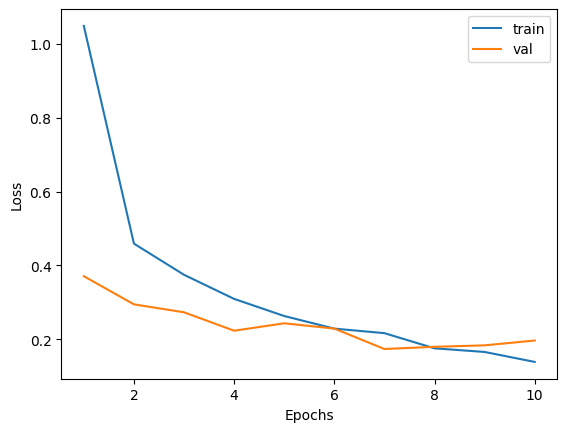

In [ ]:
from tqdm import tqdm
import torch.nn.functional as F
total_train_losses = []
total_val_losses = []


for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE
        optimizer.zero_grad()
        outputs = model(img_batch.float())
        loss = criterion(outputs, lbl_batch)
        loss.backward()
        optimizer.step()
        # *****END CODE

        train_losses.append(loss.item())
        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

        if i % 100 == 0:
            print('Train (epoch {}/{}) [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, epochs, i, len(train_dataloader),100.*i/len(train_dataloader), loss.item()))

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    train_loss_mean = np.mean(train_losses)
    total_train_losses.append(train_loss_mean)

    ##VALIDATION##
    model.eval()
    val_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch

        ##pass the images to the model and calculate the loss
        # *****START CODE
        with torch.no_grad():
            outputs = model(img_batch.float())
            loss = criterion(outputs, lbl_batch)
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    print('Confusion Matrix:')
    print(confusion_matrix.conf)

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)
    total_val_losses.append(val_loss_mean)

    print('TRAIN_LOSS: ', '%.3f' % train_loss_mean, 'TRAIN_ACC: ', '%.3f' % train_acc)
    print('VAL_LOSS: ', '%.3f' % val_loss_mean, 'VAL_ACC: ', '%.3f' % val_acc)

    write_results(save_folder, epoch, train_acc, val_acc, train_loss_mean, val_loss_mean)

    torch.save(model.state_dict(), save_folder + '/model_{}.pt'.format(epoch))

save_graph(total_train_losses, total_val_losses, epochs, save_folder)



Similarly, test the model on the test split.
You will have to load the model previously saved (see [this tutorial](https://pytorch.org/tutorials/beginner/saving_loading_models.html) on how to save and load PyTorch models).

In [ ]:
## Initialize your test DataLoader
# *****START CODE
test_csv_file = os.path.join(drive_folder, 'test.csv')
test_images_file = os.path.join(drive_folder, 'test_images.npy')
test_dataset = MyDataset(test_csv_file, test_images_file)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)
# *****END CODE

##define the model, load it and put it in evaluation mode
# *****START CODE
model = ConvNet(1, 10)
model.load_state_dict(torch.load(os.path.join(save_folder, 'model_10.pt')))
model.eval()
# *****END CODE

confusion_matrix = tnt.meter.ConfusionMeter(10)
confusion_matrix.reset()


for i, batch, in enumerate(tqdm(test_dataloader)):
    # *****START CODE
    img_batch, lbl_batch = batch
    with torch.no_grad():
        outputs = model(img_batch.float())
    # *****END CODE

    confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

print(confusion_matrix.conf)

  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 32/32 [00:01<00:00, 22.69it/s]

[[ 97   0   0   0   0   0   2   0   1   0]
 [  0 106   1   3   0   1   0   0   0   1]
 [  0   0  91   2   0   0   0   0   0   1]
 [  0   0   0  93   0   0   0   1   1   0]
 [  0   0   0   0  70   0   1   0   0  12]
 [  0   0   0   1   0  83   0   0   1   0]
 [  1   0   0   0   0   1 112   0   1   0]
 [  1   0   0   1   0   0   0 108   0   1]
 [  0   0   0   3   0   0   1   0 103   2]
 [  1   0   1   3   0   0   0   1   0  90]]


Plot the first six testing images along with their true labels.

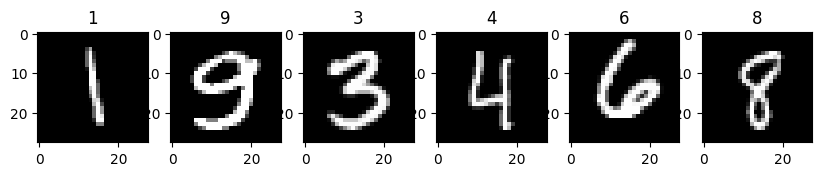

In [ ]:
##plot the testing images
# from torchvision.transforms import ToPILImage
iterator = iter(test_dataset)
n_images = 6
plt.figure(figsize=(10, n_images))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    image, title = next(iterator)
    plt.imshow(image[0], cmap='gray')
    plt.title(title)

Print the model's predicted labels for the above images.

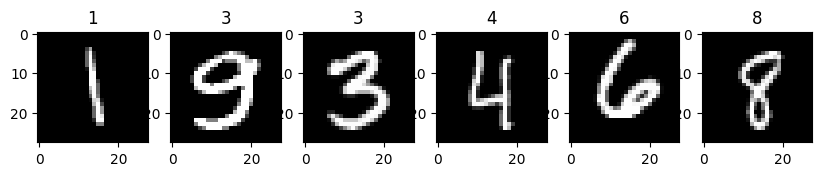

In [ ]:
##print the predicted labels for the above images
# *****START CODE
iterator = iter(test_dataset)
plt.figure(figsize=(10, n_images))
for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    image, _ = next(iterator)
    plt.imshow(image[0], cmap='gray')
    output = model(torch.tensor(image).float().unsqueeze(dim=0))
    output = torch.argmax(output).item()
    plt.title(output)
# *****END CODE

# Bonus questions

## Build-in PyTorch DataLoader for MNIST dataset

In [ ]:
import torch
from torchvision import datasets, transforms

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

dataset1 = datasets.MNIST('../data', train=True, download=True,
                       transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                       transform=transform)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset2, batch_size=32, shuffle=False)

In [ ]:
for batch_idx, batch in enumerate(train_loader):
        data, target = batch
        print('data', data.shape)
        print('target', target.shape)

data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28])
target torch.Size([32])
data torch.Size([32, 1, 28, 28]

## Link to Weight and Biaises (WandB)
Visualisation plateform to log metrics during training and evaluation

First, create an account on [WandB](https://wandb.ai/site) (you can set it up in 2 mins using your Google account)

In [ ]:
# Install wandb on the device (only needed once if you are in local)
!pip install wandb --quiet

In [ ]:
# Import the library
import wandb

In [ ]:
# Then connect to your W&B account
def wandb_connect():
    wandb_api_key_label = "wandb_api_key"
    wandb_api_key = "YOUR API HERE" # here use your API key from WandB interface

    wandb_conx = wandb.login(key = wandb_api_key)
    print(f"Connected to Wandb online interface : {wandb_conx}")

wandb_connect()

wandb: Currently logged in as: leo-fillioux. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Connected to Wandb online interface : True


In [ ]:
# define model, optimizer, criterion and number of training epochs
# *****START CODE
model = ConvNet(1, 10)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()
epochs = 10
confusion_matrix = tnt.meter.ConfusionMeter(10)
confusion_matrix.reset()
# *****END CODE

In [ ]:
# Complete the hyperparams dict with the infos of your run
# *****START CODE
hyperparams = {"Batch size": 32,
               "Learning rate": 0.05,
               "Epochs": epochs}
# *****END CODE

# Init the WandB run with hyperparams
wandb.init(config=hyperparams)

In [ ]:
for epoch in range(1,epochs+1):
    ##TRAINING##
    model.train()
    train_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(train_dataloader)):
        img_batch, lbl_batch = batch

        ##implement the forward and backward backpropagation
        # *****START CODE
        optimizer.zero_grad()
        outputs = model(img_batch.float())
        loss = criterion(outputs, lbl_batch)
        loss.backward()
        optimizer.step()
        # *****END CODE

        # log the training loss at each batch
        wandb.log({"train_loss":loss.item()})
        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

    train_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100

    ##VALIDATION##
    model.eval()
    val_losses = []
    confusion_matrix.reset()

    for i, batch, in enumerate(tqdm(val_dataloader)):
        img_batch, lbl_batch = batch

        ##pass the images to the model and calculate the loss
        # *****START CODE
        with torch.no_grad():
            outputs = model(img_batch.float())
            loss = criterion(outputs, lbl_batch)
        # *****END CODE

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())
        val_losses.append(loss.item())

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100
    val_loss_mean = np.mean(val_losses)

    # log the train & val accuracy and the val loss at each epoch
    wandb.log({"train_acc":train_acc, "val_acc":val_acc, "val_loss":val_loss_mean})

  0%|          | 0/157 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1345: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
100%|██████████| 32/32 [00:01<00:00, 30.61it/s]


Go on your WanB account and plot the train and val accuracy on the same chart

## Hyper-parameter tuning

In [ ]:
# Train a model from scratch for all these different learning rates
# and store the final validation accuracy in a array
rates = [10**8, 10**6, 10**4, 10**2, 1, 10**(-2), 10**(-4), 10**(-6)]

# *****START CODE
def get_val_acc(lr):
    model = ConvNet(1,10)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    epochs = 10

    ##TRAINING##
    model.train()
    for epoch in range(epochs):
        for i, batch, in enumerate(train_dataloader):
            img_batch, lbl_batch = batch
            optimizer.zero_grad()
            outputs = model(img_batch.float())
            loss=criterion(outputs, lbl_batch.long())
            loss.backward()
            optimizer.step()

    ##VALIDATION##
    model.eval()
    confusion_matrix = tnt.meter.ConfusionMeter(10)
    confusion_matrix.reset()

    for i, batch, in enumerate(val_dataloader):
        img_batch, lbl_batch = batch
        with torch.no_grad():
            outputs=model(img_batch.float())

        confusion_matrix.add(outputs.data.squeeze(), lbl_batch.long())

    val_acc=(np.trace(confusion_matrix.conf)/float(np.ndarray.sum(confusion_matrix.conf))) *100

    return val_acc

val_accs = []
for lr in rates:
    print("Training and evaluating network for learning rate : ", lr)
    val_accs.append(get_val_acc(lr))
# *****END CODE

Training and evaluating network for learning rate :  100000000
Training and evaluating network for learning rate :  1000000
Training and evaluating network for learning rate :  10000
Training and evaluating network for learning rate :  100
Training and evaluating network for learning rate :  1
Training and evaluating network for learning rate :  0.01
Training and evaluating network for learning rate :  0.0001
Training and evaluating network for learning rate :  1e-06


<Axes: xlabel='Learning rate'>

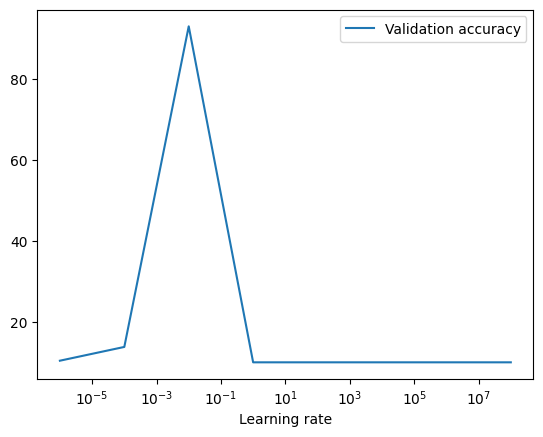

In [ ]:
# Plot the validation error with respect to the learning rate

# *****START CODE
df_accs = pd.DataFrame({'Learning rate': rates,
                       'Validation accuracy': val_accs,})

df_accs.plot.line(x='Learning rate', y='Validation accuracy', logx=True)
# *****END CODE